### Overview

In this blog we wil analyse covid-19 data of India Region using `Matplotlib`.

**Importing all the necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request, json 

### Using covid19api

We are extracting the data from the url `https://api.covid19api.com/total/country/india` which is in json format. We are using `urllib.request & json` library to extract and load the data.  

The data updates on a daily basis and available till a day before.

In [2]:
# Importing covid 19 latest available data
with urllib.request.urlopen("https://api.covid19api.com/total/country/india") as url:
    data = json.loads(url.read().decode())

# converting the data into Dataframe
covid_india_data=pd.DataFrame(data)

In [3]:
covid_india_data.tail()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
488,India,,,,,0,0,26948874,307231,24054861,2720716,2021-05-24T00:00:00Z
489,India,,,,,0,0,27157795,311388,24350816,2586782,2021-05-25T00:00:00Z
490,India,,,,,0,0,27369093,315235,24633951,2495591,2021-05-26T00:00:00Z
491,India,,,,,0,0,27555457,318895,24893410,2419907,2021-05-27T00:00:00Z
492,India,,,,,0,0,27729247,322512,25178011,2343152,2021-05-28T00:00:00Z


The key points that we can see from our dataframes are:-
- The available data is only at Country(India) level.
- Every day data is available.
- Confirmed, Deaths and Recovered data are available as cumulative sum i.e. everyday we are getting `total number of Confirmed, Deaths and Recovered cases` till date.


In order to get the data for each day(not cumulative data) we need to subtract each row from its above row.

In [4]:
# Creating calculated columns for 'Confirmed','Death','Recovered' cases
covid_india_data["Calculate_Confirmed"]=covid_india_data["Confirmed"].diff()
covid_india_data["Calculate_Death"]=covid_india_data["Deaths"].diff()
covid_india_data["Calculate_Recovered"]=covid_india_data["Recovered"].diff()

We also want to show 7 days rolling average of our data so we are creating calculated columns for each Confirmed, Death and Recovered columns

In [5]:
# 7 days rolling average
covid_india_data["Rolling_Confirmed"]=covid_india_data["Calculate_Confirmed"].rolling(window=7).mean()
covid_india_data["Rolling_Death"]=covid_india_data["Calculate_Death"].rolling(window=7).mean()
covid_india_data["Rolling_Recovered"]=covid_india_data["Calculate_Recovered"].rolling(window=7).mean()

We only want "yyyy-mm-dd" format data from our date column.

In [6]:
# split Date column
covid_india_data["Date"]=covid_india_data["Date"].str.split("T",expand=True)[0]

Now we are using `matplotlib` to plot trend of covid data. Steps that we are performing are:-

1. Giving the figure size as (15,5) inches and keeping dpi (dots per inches) equal to 300
2. Plotting bar graph for daily confirmed cases. 
3. Plotting line graph for 7 days rolling average of recovered and confirmed cases
4. Printing level of last available date
5. Showing the data for each day but sowing xticks in 7 days gap( to clearly visualize xticks )

Another key points are:
1. For color of bars and line graph we can either put color name or its hex number
2. There are different types of plotting styles available that we can use:-
    1. fivethirtyeight 
    2. classic
    3. seaborn-pastel
    4. seaborn-whitegrid
    5. ggplot
    6. grayscale
    7. default
    
    To use any of the above style we need to run `plt.style.use('plot_style_name')`
    
    example :- `plt.style.use('fivethirtyeight')`

**Plotting Covid-19 Trend of Confirmed & Recovered Cases**

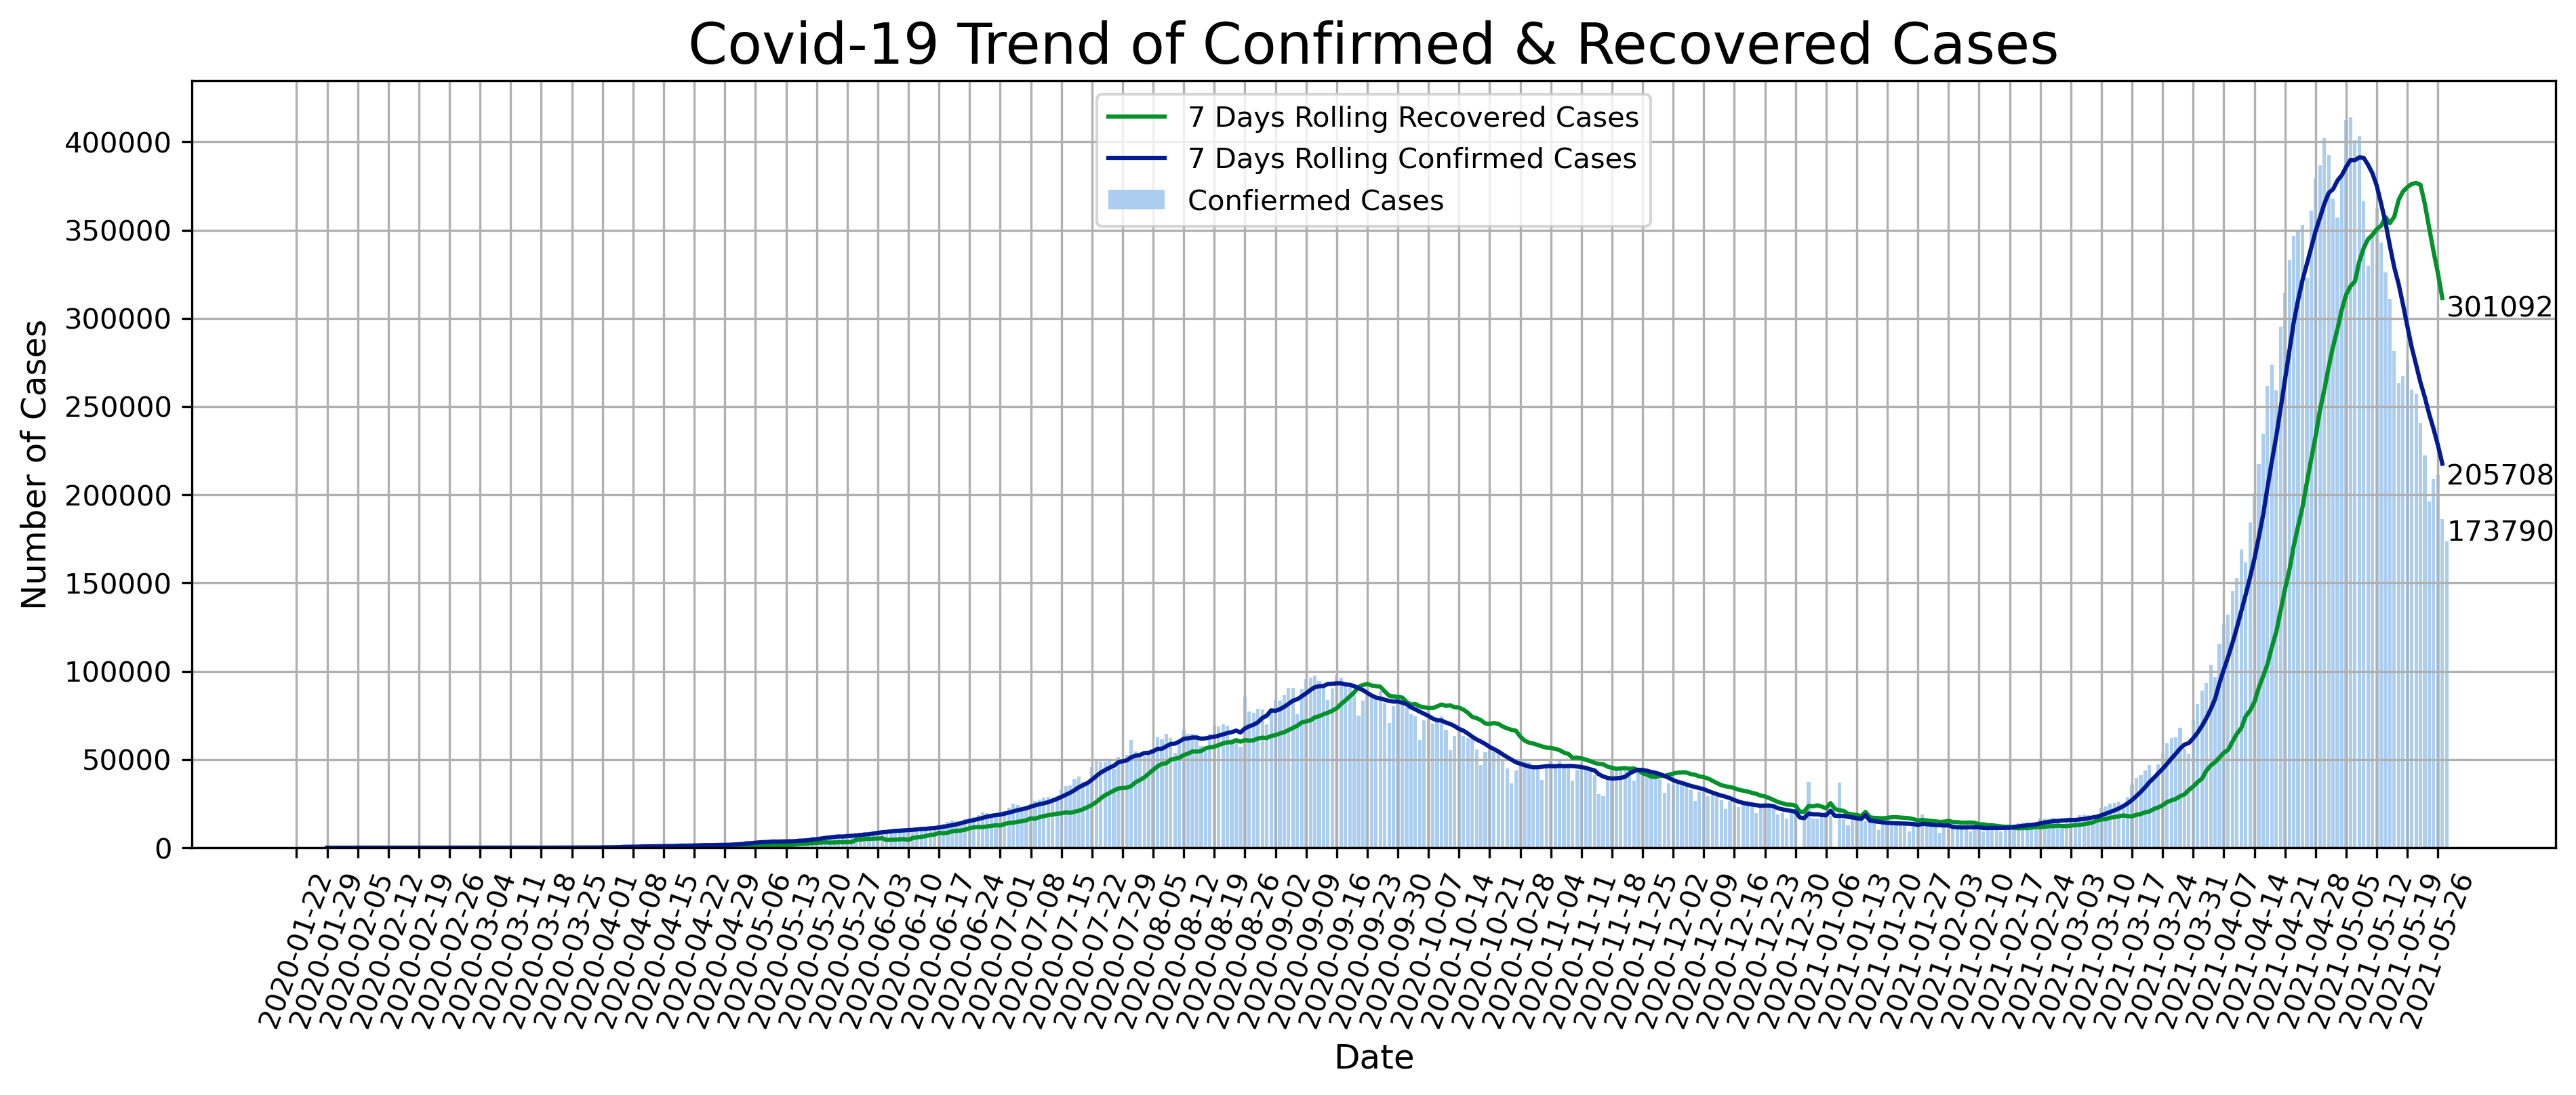

In [7]:
# figuresize
plt.figure(figsize=(15,5),dpi=300)

# bar graph for confirmed cases
plt.bar(covid_india_data["Date"],covid_india_data["Calculate_Confirmed"],color='#abcdef',label="Confiermed Cases")

# line graph for 7 Days Rolling Recovered & Confirmed Cases Cases
plt.plot(covid_india_data["Date"][:-1],covid_india_data["Rolling_Recovered"][:-1],color='#039129',label="7 Days Rolling Recovered Cases")
plt.plot(covid_india_data["Date"][:-1],covid_india_data["Rolling_Confirmed"][:-1],color='#031b91',label="7 Days Rolling Confirmed Cases")

# title, xlabel and ylabel
plt.title("Covid-19 Trend of Confirmed & Recovered Cases",fontsize=20)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Number of Cases",fontsize=12)

# grid and legend
plt.grid()
plt.legend()

# plotting level for latest available day
plt.text(covid_india_data["Date"].iloc[-1],covid_india_data["Calculate_Confirmed"].iloc[-1], int(covid_india_data["Calculate_Confirmed"].iloc[-1]))
plt.text(covid_india_data["Date"].iloc[-1],covid_india_data["Rolling_Recovered"].iloc[-1],int(covid_india_data["Rolling_Recovered"].iloc[-1]))
plt.text(covid_india_data["Date"].iloc[-1],covid_india_data["Rolling_Confirmed"].iloc[-1],int(covid_india_data["Rolling_Confirmed"].iloc[-1]))

# xtickes in gap of 7
plt.xticks(covid_india_data["Date"][::7])
# rotating xticks
plt.xticks(rotation=70)

# saving figure
plt.savefig("Covid Trend.jpg",dpi=300)

#show
plt.show()

**Plotting Covid-19 Trend of Death Cases**

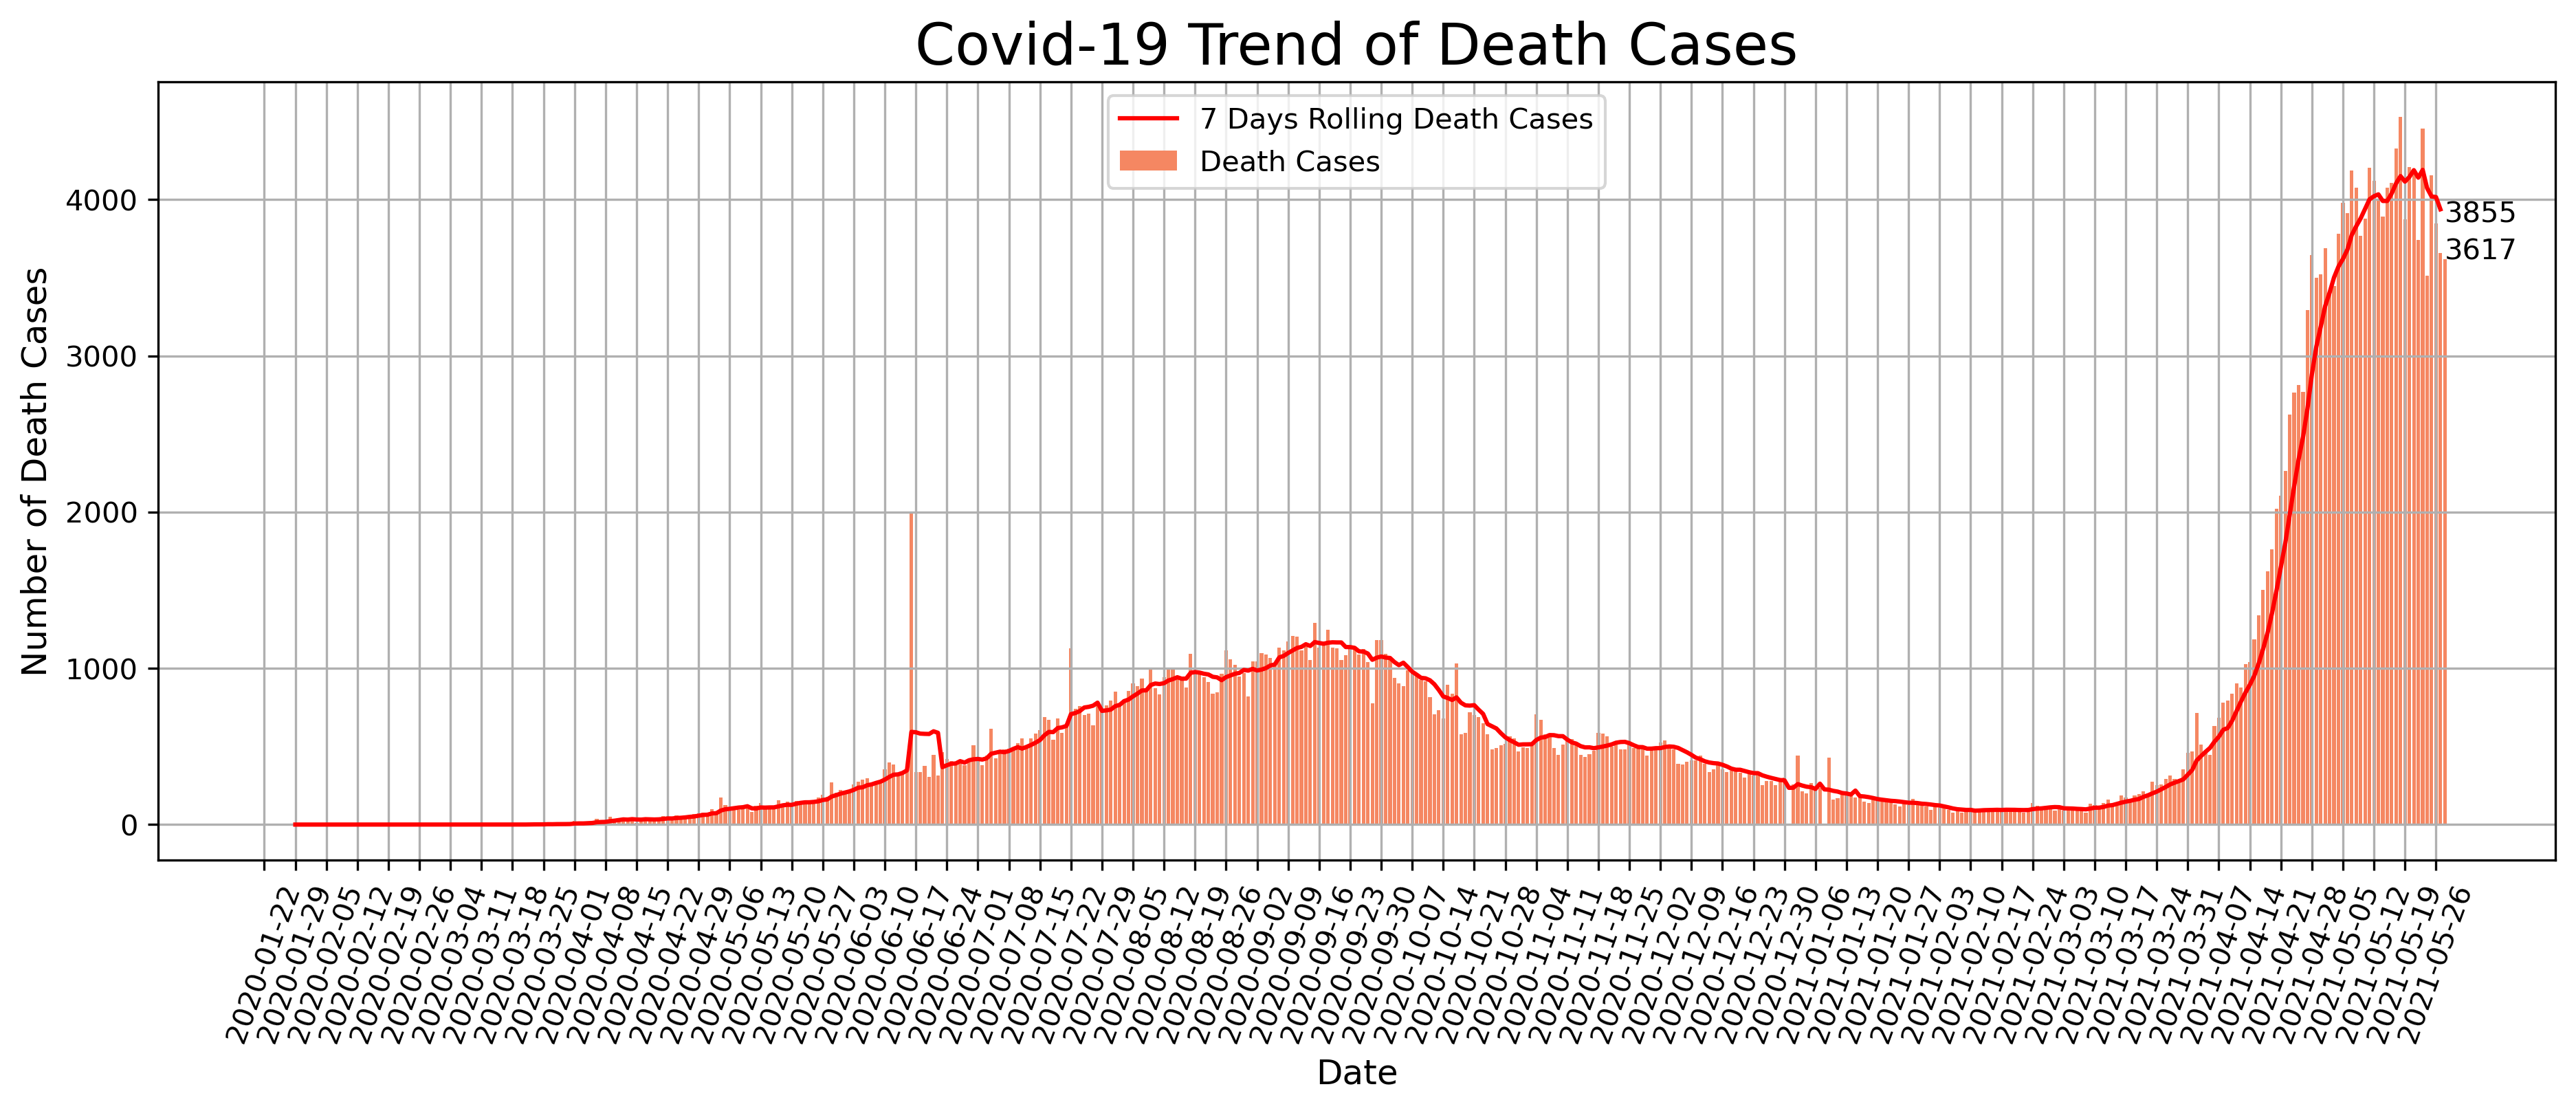

In [8]:
# figuresize
plt.figure(figsize=(15,5),dpi=300)

# bar graph for death cases
plt.bar(covid_india_data["Date"],covid_india_data["Calculate_Death"],color='#f58762',label="Death Cases")
# line graph for 7 Days Rolling Death Cases
plt.plot(covid_india_data["Date"][:-1],covid_india_data["Rolling_Death"][:-1],color='Red',label="7 Days Rolling Death Cases")

# title, xlabel and ylabel
plt.title("Covid-19 Trend of Death Cases",fontsize=20)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Number of Death Cases",fontsize=12)

# grid and legend
plt.grid()
plt.legend()

# plotting level for latest available day
plt.text(covid_india_data["Date"].iloc[-1],covid_india_data["Rolling_Death"].iloc[-1], int(covid_india_data["Rolling_Death"].iloc[-1]))
plt.text(covid_india_data["Date"].iloc[-1],covid_india_data["Calculate_Death"].iloc[-1],int(covid_india_data["Calculate_Death"].iloc[-1]))

# xtickes in gap of 7
plt.xticks(covid_india_data["Date"][::7])
# rotating xticks
plt.xticks(rotation=70)

# saving figure
plt.savefig("Covid Death Trend.jpg",dpi=300)

#show
plt.show()

Now we are plotting both the above graphs in a single frame usng subplot and also printing total number of confirmed,  recovered and death cases.

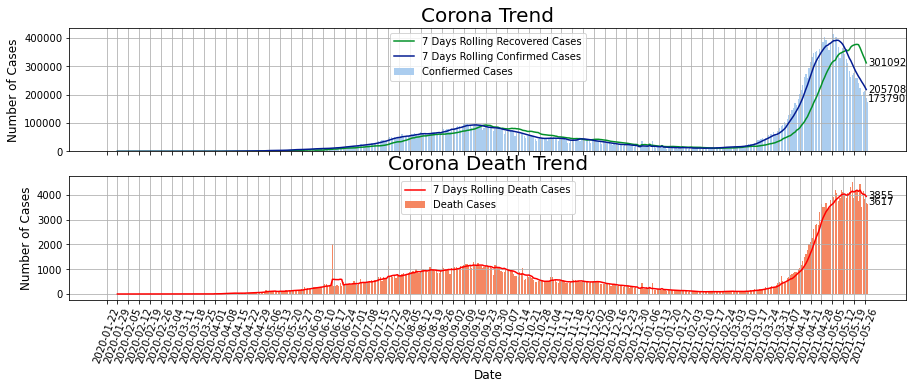

  Total number of confirm cases till date in India -> 27729247
  Total number of recovered cases till date in India -> 25178011
  Total number of death till date in India -> 322512


In [9]:
# figuresize
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 5))

# bar graph for confirmed cases
ax1.bar(covid_india_data["Date"],covid_india_data["Calculate_Confirmed"],color='#abcdef',label="Confiermed Cases")

# line graph for 7 Days Rolling Recovered & Confirmed Cases Cases
ax1.plot(covid_india_data["Date"][:-1],covid_india_data["Rolling_Recovered"][:-1],color='#039129',label="7 Days Rolling Recovered Cases")
ax1.plot(covid_india_data["Date"][:-1],covid_india_data["Rolling_Confirmed"][:-1],color='#031b91',label="7 Days Rolling Confirmed Cases")

# title
ax1.set_title("Corona Trend",fontsize=20)

# grid, legend and ylabel
ax1.grid()
ax1.legend()
ax1.set_ylabel("Number of Cases",fontsize=12)

# plotting level for latest available day
ax1.text(covid_india_data["Date"].iloc[-1],covid_india_data["Calculate_Confirmed"].iloc[-1], int(covid_india_data["Calculate_Confirmed"].iloc[-1]))
ax1.text(covid_india_data["Date"].iloc[-1],covid_india_data["Rolling_Recovered"].iloc[-1],int(covid_india_data["Rolling_Recovered"].iloc[-1]))
ax1.text(covid_india_data["Date"].iloc[-1],covid_india_data["Rolling_Confirmed"].iloc[-1],int(covid_india_data["Rolling_Confirmed"].iloc[-1]))

######################################## second plot ########################################

# bar graph for death cases
ax2.bar(covid_india_data["Date"],covid_india_data["Calculate_Death"],color='#f58762',label="Death Cases")

# line graph for 7 Days Rolling Recovered & Confirmed Cases Cases
ax2.plot(covid_india_data["Date"][:-1],covid_india_data["Rolling_Death"][:-1],color='Red',label="7 Days Rolling Death Cases")

# title
ax2.set_title("Corona Death Trend",fontsize=20)

# grid, legend and ylabel
ax2.grid()
ax2.legend()
ax2.set_ylabel("Number of Cases",fontsize=12)

# plotting level for latest available day
ax2.text(covid_india_data["Date"].iloc[-1],covid_india_data["Rolling_Death"].iloc[-1], int(covid_india_data["Rolling_Death"].iloc[-1]))
ax2.text(covid_india_data["Date"].iloc[-1],covid_india_data["Calculate_Death"].iloc[-1],int(covid_india_data["Calculate_Death"].iloc[-1]))

# xtickes in gap of 7
ax2.set_xticks(covid_india_data["Date"][::7])
# rotating xticks
ax2.set_xticklabels(covid_india_data["Date"][::7],rotation=70)

# xlabel
plt.xlabel("Date",fontsize=12)

# saving figure
plt.savefig("Covid Combine Trends.jpg",dpi=300)

# show
plt.show()

# printing total confirmed, recovered and death cases
print('\033[1m','\033[96m',"Total number of confirm cases till date in India ->",covid_india_data["Confirmed"].iloc[-1])
print('\033[92m'," Total number of recovered cases till date in India ->",covid_india_data["Recovered"].iloc[-1])
print('\033[91m'," Total number of death till date in India ->",covid_india_data["Deaths"].iloc[-1])